<a href="https://colab.research.google.com/github/JumaahRoslan17/Association-Rules---Book/blob/main/AR_Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving my_movies.csv to my_movies.csv


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
movies = pd.read_csv('my_movies.csv')

In [ ]:
movies = movies.iloc[:,[0,1,2,3,4]]

In [ ]:
movies.iloc[:,2:5] = movies.iloc[:,2:5].apply(lambda x:x.fillna(0))

In [ ]:
X = pd.get_dummies(movies[['V1','V2','V3','V4','V5']])

In [ ]:
x_dummies = X.iloc[:,[9,14,16]]

In [ ]:
frequent_items = apriori(x_dummies,min_support = 0.005, max_len=2, use_colnames = True)

In [ ]:
frequent_items.sort_values('support', ascending = False, inplace = True)

In [ ]:
rules_dummies = association_rules(frequent_items, metric = 'lift', min_threshold=1)
rules_dummies.sort_values('lift', ascending = False, inplace=True)

In [ ]:
def to_list(i):
  return(sorted(i))

In [ ]:
rules_add = rules_dummies.antecedents.apply(to_list) + rules_dummies.consequents.apply(to_list)

In [ ]:
rules_add = rules_add.apply(sorted)

In [ ]:
rules_set = list(rules_add)

In [ ]:
unique_rules = [list(m) for m in set(tuple(i) for i in rules_set)]
index_rules = []
for i in unique_rules:
  index_rules.append(rules_set.index(i))

In [ ]:
rules_without_redud = rules_dummies.iloc[index_rules,:]

In [ ]:
rules_without_redud.sort_values('lift', ascending=False, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
Support = rules_without_redud['support']
confidence = rules_without_redud['confidence']

Text(0, 0.5, 'confidence')

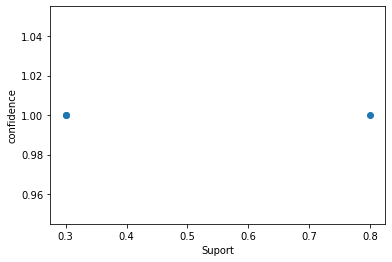

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(Support,confidence);plt.xlabel("Suport");plt.ylabel("confidence")

In [ ]:
x_without_dum = X.iloc[:,[0,1,2,3,4,5,6,7,8,10,11,12,13,15,17]]

In [ ]:
frequents_item1 = apriori(x_without_dum, min_support=0.005, max_len=2, use_colnames=True)
frequents_item1.sort_values('support',ascending=False, inplace=True)

In [ ]:
rules_without = association_rules(frequents_item1, metric='lift', min_threshold=1)
rules_without.sort_values('lift',ascending=False, inplace=True)

In [ ]:
def to_list_out(i):
  return(sorted(i))

In [ ]:
rules_out_add = rules_without.antecedents.apply(to_list_out)+rules_without.consequents.apply(to_list_out)

In [ ]:
rules_out_add = rules_out_add.apply(sorted)
rules_set_out = list(rules_out_add)

In [ ]:
unique_values_out = [list(n) for n in set(tuple(i) for i in rules_set_out)]
index_rules_out=[]
for i in unique_values_out:
  index_rules_out.append(rules_set_out.index(i))

In [ ]:
rules_without_out = rules_without.iloc[index_rules_out,:]

In [ ]:
Support_out = rules_without_out["support"]
Confidence_out = rules_without_out["confidence"]
lift = rules_without_out["lift"]

In [ ]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0, 'lift')

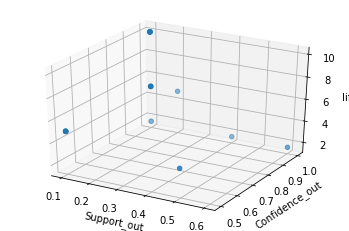

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(Support_out, Confidence_out, lift)
ax.set_xlabel("Support_out")
ax.set_ylabel("Confidence_out")
ax.set_zlabel("lift")

Text(0, 0.5, 'Confidence')

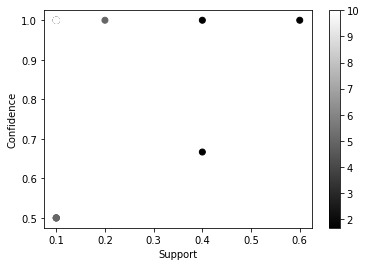

In [ ]:
import scipy as sp
plt.scatter(Support_out, Confidence_out, c=lift,cmap='gray')
plt.colorbar()
plt.xlabel("Support")
plt.ylabel("Confidence")

creating the model with the dummy variables

In [ ]:
data_dummies = pd.read_csv('my_movies.csv')

In [ ]:
data_dummies = data_dummies.iloc[:,5:]

In [ ]:
frequent_ori = apriori(data_dummies, min_support = 0.005, max_len=2, use_colnames=True)
frequent_ori.sort_values('support', ascending=False, inplace=True)

In [ ]:
rules_ori = association_rules(frequent_ori, metric='lift', min_threshold=1)
rules_ori.sort_values('lift', ascending=False, inplace=True)

In [ ]:
def to_list_ori(i):
  return(sorted(i))

In [ ]:
ori_add = rules_ori.antecedents.apply(to_list_ori)+rules_ori.consequents.apply(to_list_ori)

In [ ]:
ori_add = ori_add.apply(sorted)

In [ ]:
ori_set = list(ori_add)
unique_ori = [list(m) for m in set(tuple(i) for i in ori_set)]

In [ ]:
index_ori = []
for i in unique_ori:
  index_ori.append(ori_set.index(i))

In [ ]:
rules_without_ori = rules_ori.iloc[index_ori,:]

In [ ]:
rules_without_ori.sort_values('lift', ascending = False, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
Support_ori = rules_without_ori["support"]
confidence_ori = rules_without_ori["confidence"]
lift_ori = rules_without_ori["lift"]

Text(0.5, 0, 'lift')

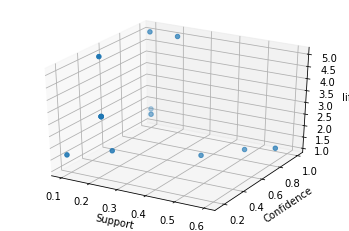

In [ ]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(Support_ori,confidence_ori,lift_ori)
ax1.set_xlabel("Support")
ax1.set_ylabel("Confidence")
ax1.set_zlabel("lift")

Text(0, 0.5, 'confidence')

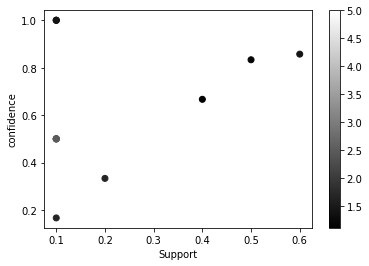

In [ ]:
plt.scatter(Support_ori,confidence_ori, c=lift_ori, cmap ='gray')
plt.colorbar()
plt.xlabel("Support")
plt.ylabel("confidence")